# Les Paradoxes de Zénon

Zénon d'Élée (VIe siècle av. J.-C.) a formulé une quarantaine de paradoxes philosophiques. Ces dilemmes logiques remettent en question les fondements de notre perception  de la réalité.

## Objectif
Simuler en Python 3 des plus célèbres paradoxes de Zénon et démontrer leurs limites mathématiques par la programmation moderne.

## 1️ Paradoxe d’Achille et la tortue

In [1]:
# Positions initiales
achille = 0
tortue = 10

# Vitesses (m/s)
v_achille = 7
v_tortue = 5

# Temps écoulé
t = 0

# Boucle : on avance à chaque secondee
while achille < tortue:
    achille += v_achille  # TODO : compléter la formule de déplacement d'Achille !
    tortue += v_tortue 
    t += 1
    print(f"t={t}s, Achille={achille}, Tortue={tortue}")

print("Achille a rattrapé la tortue en", t, "secondes")

t=1s, Achille=7, Tortue=15
t=2s, Achille=14, Tortue=20
t=3s, Achille=21, Tortue=25
t=4s, Achille=28, Tortue=30
t=5s, Achille=35, Tortue=35
Achille a rattrapé la tortue en 5 secondes


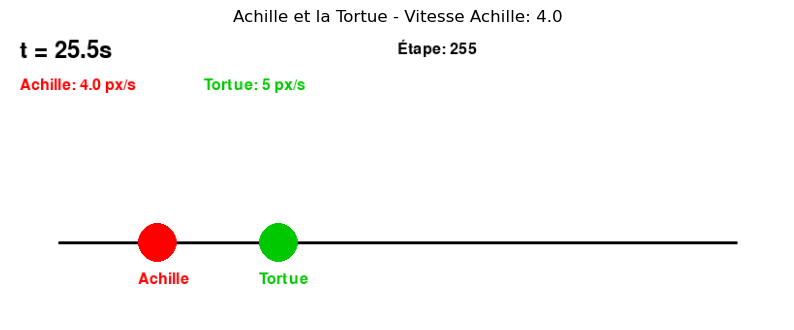

Étape 255: Achille=102.0, Tortue=227.5


KeyboardInterrupt: 

In [14]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
import sys

def simulation(v_achille):
    # --- Données initiales ---
    achille = 0
    tortue = 100   # position initiale (pixels)
    v_tortue = 5   # pixels/frame
    t = 0
    arrivee = False
    step = 0

    # --- Pygame setup (pour le rendu) ---
    pygame.init()
    largeur, hauteur = 800, 300
    surface = pygame.Surface((largeur, hauteur))

    blanc = (255, 255, 255)
    rouge = (255, 0, 0)
    vert = (0, 200, 0)
    noir = (0, 0, 0)
    font = pygame.font.SysFont(None, 36)
    small_font = pygame.font.SysFont(None, 24)

    def draw_frame():
        # Effacer la surface
        surface.fill(blanc)

        # Afficher les informations en haut
        texte = font.render(f"t = {t:.1f}s", True, noir)
        surface.blit(texte, (10, 10))

        v_text = small_font.render(f"Achille: {v_achille} px/s", True, rouge)
        surface.blit(v_text, (10, 50))
        v_tortue_text = small_font.render(f"Tortue: {v_tortue} px/s", True, vert)
        surface.blit(v_tortue_text, (200, 50))

        step_text = small_font.render(f"Étape: {step}", True, noir)
        surface.blit(step_text, (400, 10))

        # Ligne de piste horizontale
        ligne_y = hauteur - 80
        pygame.draw.line(surface, noir, (50, ligne_y), (largeur-50, ligne_y), 3)

        # Dessiner Achille (cercle rouge) et la Tortue (cercle vert) sur la ligne
        pygame.draw.circle(surface, rouge, (int(achille) + 50, ligne_y), 20)
        pygame.draw.circle(surface, vert, (int(tortue) + 50, ligne_y), 20)
        
        # Labels
        label_achille = small_font.render("Achille", True, rouge)
        surface.blit(label_achille, (int(achille) + 30, ligne_y + 30))
        label_tortue = small_font.render("Tortue", True, vert)
        surface.blit(label_tortue, (int(tortue) + 30, ligne_y + 30))

        # Condition de fin
        if arrivee:
            result = font.render(f"Achille a rattrapé la tortue en {t:.1f}s", True, noir)
            surface.blit(result, (50, hauteur//2))

        # Conversion pour matplotlib
        img = np.transpose(pygame.surfarray.array3d(surface), (1, 0, 2))
        
        # Affichage matplotlib
        plt.figure(figsize=(10, 4))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Achille et la Tortue - Vitesse Achille: {v_achille}")
        plt.show()

    # --- Affichage initial ---
    draw_frame()
    print(f"Début: Achille={achille}, Tortue={tortue}")

    # --- Simulation ---
    while not arrivee:
        time.sleep(0.5)  # Pause entre les frames
        
        # Mise à jour des positions
        achille += v_achille * 0.1
        tortue += v_tortue * 0.1
        t += 0.1
        step += 1

        # Vérifier si Achille rattrape la tortue
        if achille >= tortue:
            arrivee = True

        clear_output(wait=True)
        draw_frame()
        print(f"Étape {step}: Achille={achille:.1f}, Tortue={tortue:.1f}")

    print(f"✓ Achille a rattrapé la tortue en {step} étapes - Temps total: {t:.1f}s")


# --- Boucle globale pour gérer relance ---
def run_simulation():
    while True:
        try:
            v_achille = float(input("Entrez la vitesse d'Achille (ex: 7): "))
        except ValueError:
            v_achille = 7  # valeur par défaut si mauvaise saisie

        simulation(v_achille)
        
        restart = input("Voulez-vous relancer la simulation? (o/n): ")
        if restart.lower() != 'o':
            break

# Pour lancer la simulation
run_simulation()

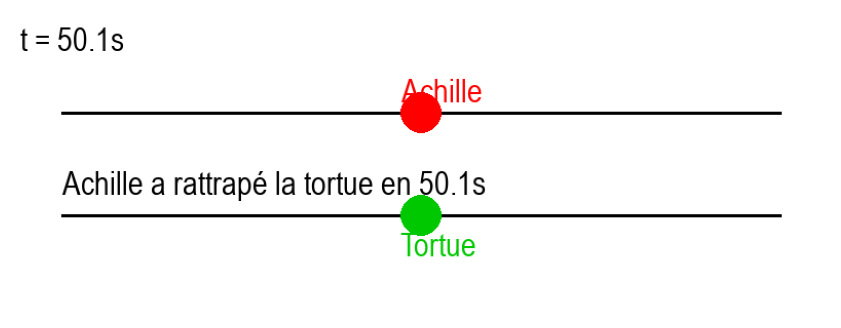

t=50.1s: Achille=350.7m, Tortue=350.5m
✓ Achille a rattrapé la tortue en 50.1 secondes!
Position finale: Achille=350.7m, Tortue=350.5m


In [24]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Initialiser pygame
pygame.init()

# Paramètres
v_achille = 7  # vitesse par défaut
v_tortue = 5
largeur, hauteur = 800, 300
surface = pygame.Surface((largeur, hauteur))

# Couleurs
blanc = (255, 255, 255)
rouge = (255, 0, 0)
vert = (0, 200, 0)
noir = (0, 0, 0)

# Police
font = pygame.font.SysFont("ubuntu", 32)

# Positions des lignes
ligne_achille = hauteur // 3
ligne_tortue = 2 * hauteur // 3

def draw_frame(achille, tortue, t, arrivee):
    surface.fill(blanc)
    
    # Lignes de course
    pygame.draw.line(surface, noir, (50, ligne_achille), (largeur-50, ligne_achille), 3)
    pygame.draw.line(surface, noir, (50, ligne_tortue), (largeur-50, ligne_tortue), 3)
    
    # Personnages (limiter la position à l'écran)
    pos_achille = min(int(achille) + 50, largeur-70)
    pos_tortue = min(int(tortue) + 50, largeur-70)
    
    pygame.draw.circle(surface, rouge, (pos_achille, ligne_achille), 20)
    pygame.draw.circle(surface, vert, (pos_tortue, ligne_tortue), 20)
    
    # Labels
    label_achille = font.render("Achille", True, rouge)
    surface.blit(label_achille, (pos_achille - 20, ligne_achille - 40))
    label_tortue = font.render("Tortue", True, vert)
    surface.blit(label_tortue, (pos_tortue - 20, ligne_tortue + 10))
    
    # Temps
    texte = font.render(f"t = {t:.1f}s", True, noir)
    surface.blit(texte, (10, 10))
    
    # Message de fin
    if arrivee:
        result = font.render(f"Achille a rattrapé la tortue en {t:.1f}s", True, noir)
        surface.blit(result, (50, hauteur//2))
    
    # Conversion pour matplotlib
    img = np.transpose(pygame.surfarray.array3d(surface), (1,0,2))
    plt.figure(figsize=(12, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Initialisation
achille = 0
tortue = 100
t = 0
arrivee = False

# Affichage initial
draw_frame(achille, tortue, t, arrivee)
print(f"Début: Achille={achille}m, Tortue={tortue}m, Vitesse Achille={v_achille}m/s")

# Simulation
while not arrivee:
    time.sleep(0.5)
    
    # Mise à jour des positions
    achille += v_achille * 0.1
    tortue += v_tortue * 0.1
    t += 0.1
    
    # Vérifier si Achille rattrape la tortue
    if achille >= tortue:
        arrivee = True
    
    clear_output(wait=True)
    draw_frame(achille, tortue, t, arrivee)
    print(f"t={t:.1f}s: Achille={achille:.1f}m, Tortue={tortue:.1f}m")

print(f"✓ Achille a rattrapé la tortue en {t:.1f} secondes!")
print(f"Position finale: Achille={achille:.1f}m, Tortue={tortue:.1f}m")

## 2️ Paradoxe de la dichotomie

### L’idée de Zénon
Imaginons une pierre à lancer vers un arbre situé à 8 mètres.
Avant d’arriver à l’arbre, la pierre doit d’abord parcourir la moitié de la distance → 4 m.
Puis la moitié de ce qu’il reste → 2 m.
Puis encore la moitié → 1 m.
Puis encore la moitié → 0.5 m… et ainsi de suite.

Selon Zénon, la pierre doit accomplir une infinité d’étapes pour atteindre l’arbre, ce qui semble rendre le mouvement infini.

### Modelisation du mouvement

In [19]:
def dichotomy(total_distance, max_steps, verbose=True):
    """
    Simule le paradoxe de la dichotomie.
    
    total_distance : distance initiale
    stop       : seuil d'arrêt
    max_steps      : nombre maximum d'étapes
    verbose        : affiche ou non dans la console
    
    Retourne : une liste de tuples (step, position, reste).
    """
    reste = total_distance
    position = 0.0
    step = 0
    history = []

    if verbose:
        print(f"{'step':>1} | {'position':>12} | {'distance restante':>20}")
        print("-" * 44)

    while  step < max_steps:
        
        move = reste / 2.0
        position += move
        reste -= move
        history.append((step, position, reste))
        step += 1

        if verbose:
            print(f"{step:4d} | {position:12.8f} | {reste:20.8f}")

    if verbose:
        print("\nSimulation terminée.")
        print(f"Étapes réalisées : {step}")
        print(f"Position finale approximative : {position:.10f}")
        print(f"Distance restante ≈ {reste:.10f} ")

    return history 
# Test rapide
if __name__ == "__main__":
    dichotomy( 8,10, verbose=True)

    dichotomy( 8,20, verbose=True)
    dichotomy( 8,50, verbose=True)

step |     position |    distance restante
--------------------------------------------
   1 |   4.00000000 |           4.00000000
   2 |   6.00000000 |           2.00000000
   3 |   7.00000000 |           1.00000000
   4 |   7.50000000 |           0.50000000
   5 |   7.75000000 |           0.25000000
   6 |   7.87500000 |           0.12500000
   7 |   7.93750000 |           0.06250000
   8 |   7.96875000 |           0.03125000
   9 |   7.98437500 |           0.01562500
  10 |   7.99218750 |           0.00781250

Simulation terminée.
Étapes réalisées : 10
Position finale approximative : 7.9921875000
Distance restante ≈ 0.0078125000 
step |     position |    distance restante
--------------------------------------------
   1 |   4.00000000 |           4.00000000
   2 |   6.00000000 |           2.00000000
   3 |   7.00000000 |           1.00000000
   4 |   7.50000000 |           0.50000000
   5 |   7.75000000 |           0.25000000
   6 |   7.87500000 |           0.12500000
   7 |   7.93

### Visualisation

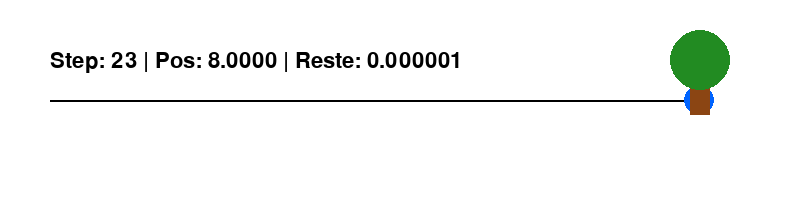

In [20]:
import pygame
import time
from IPython.display import display, clear_output
from PIL import Image
import ipywidgets as widgets
from ipywidgets import interact, interactive_output

def visual_dichotomy(total_distance, max_steps):
    """
    Simulation du paradoxe de la dichotomie (Zénon) avec affichage Pygame dans Jupyter.
    
    total_distance : distance initiale à parcourir
    max_steps      : nombre maximum d'étapes
    """
    pygame.init()
    width, height = 800, 200
    screen = pygame.Surface((width, height))
    font = pygame.font.SysFont(None, 32)
    delay = 0.5

    start_x = 50
    end_x = width - 100
    line_y = height // 2

    remaining = total_distance
    position = 0.0
    step = 0

    while step < max_steps and remaining > 1e-6:
        move = remaining / 2.0
        position += move
        remaining -= move
        step += 1

        # Effacer écran
        screen.fill((255, 255, 255))

        # Ligne de course
        pygame.draw.line(screen, (0, 0, 0), (start_x, line_y), (end_x, line_y), 2)

        # Joueur
        x = start_x + (position / total_distance) * (end_x - start_x)
        pygame.draw.circle(screen, (0, 100, 255), (int(x), line_y), 15)

        # --- 🌳 Dessiner un arbre au bout de la ligne ---
        # Tronc
        trunk_width, trunk_height = 20, 40
        trunk_x = end_x - trunk_width // 2
        trunk_y = line_y - trunk_height + 15
        pygame.draw.rect(screen, (139, 69, 19), (trunk_x, trunk_y, trunk_width, trunk_height))  # marron

        # Feuillage
        foliage_radius = 30
        foliage_x = end_x
        foliage_y = trunk_y - foliage_radius // 2
        pygame.draw.circle(screen, (34, 139, 34), (foliage_x, foliage_y), foliage_radius)  # vert

        # Texte
        text = font.render(f"Step: {step} | Pos: {position:.4f} | Reste: {remaining:.6f}", True, (0, 0, 0))
        screen.blit(text, (50, 50))

        # Conversion pygame -> image notebook
        img_str = pygame.image.tostring(screen, "RGB")
        img = Image.frombytes("RGB", (width, height), img_str)

        clear_output(wait=True)
        display(img)
        time.sleep(delay)

    pygame.quit()


# Test
visual_dichotomy(8, 20)
visual_dichotomy(8, 50)

## 3️ Paradoxe de la flèche en vol

### 2500 ans de casse-tête
Le philosophe grec Zénon affirmait : "À chaque instant, la flèche occupe un espace égal à elle-même, donc elle est au repos à chaque instant, donc toujours au repos." Comment quelque chose peut-il bouger si elle est immobile à chaque instant ?


pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


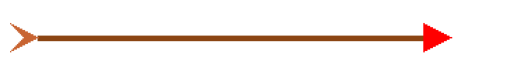

In [1]:
import pygame
import numpy as np
import matplotlib.pyplot as plt

pygame.init()
w, h = 360, 40
surf = pygame.Surface((w, h))

def draw_arrow():
    surf.fill((255, 255, 255))
    cx, cy = w // 2, h // 2
    start, end = 20, w - 60  # pointe et plumes

    # Corps de la flèche
    pygame.draw.line(surf, (139, 69, 19), (start, cy), (end, cy), 4)

    # Pointe
    pygame.draw.polygon(surf, (255,0,0), [(end + 20, cy), (end, cy - 10), (end, cy + 10)])

    # Plumes
    pygame.draw.polygon(surf, (200, 100, 50), [(start, cy), (start - 20, cy - 10), (start - 10, cy)])
    pygame.draw.polygon(surf, (200, 100, 50), [(start, cy), (start - 20, cy + 10), (start - 10, cy)])
    
    # Affichage
    img = np.transpose(pygame.surfarray.array3d(surf), (1, 0, 2))
    plt.imshow(img); plt.axis("off"); plt.show()

draw_arrow()

### Zenon prétend que ceci est une illusion

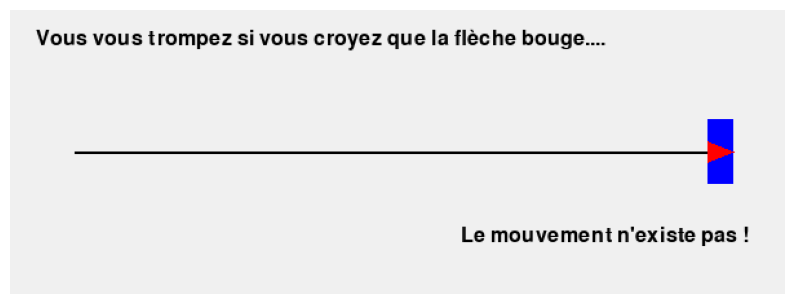

In [4]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Initialiser pygame
pygame.init()

# Paramètres
v = 100
distance = 10
dt = 0.002
width, height = 600, 220  
start_x, end_x = 50, width-50  
line_y = height // 2  
target_w, target_h = 20, 50    
triangle_w = 20                
triangle_h = 16                

surface = pygame.Surface((width, height))
x = 0

while x / distance < 1.0:
    x_progress = min(x / distance, 1.0)
    
    # Position de la pointe 
    arrow_tip_x = start_x + x_progress * (end_x - start_x)
    
    # Effacer surface
    surface.fill((240, 240, 240))
    
    # titre en haut à gauche dès le début 
    title_font = pygame.font.SysFont(None, 24)  
    left_title_text = title_font.render("Vous vous trompez si vous croyez que la flèche bouge.", True, (0, 0, 0))
    left_title_rect = left_title_text.get_rect(topleft=(20, 15))
    surface.blit(left_title_text, left_title_rect)
    
    # Ligne et cible bleue
    pygame.draw.line(surface, (0, 0, 0), (start_x, line_y), (end_x, line_y), 2)
    pygame.draw.rect(surface, (0, 0, 255), 
                     (end_x - target_w//2, line_y - target_h//2, target_w, target_h))
    
    # Triangle rouge
    pygame.draw.polygon(
        surface,
        (255, 0, 0),
        [(int(arrow_tip_x), line_y),
         (int(arrow_tip_x) - triangle_w, line_y - triangle_h//2),
         (int(arrow_tip_x) - triangle_w, line_y + triangle_h//2)]
    )
    
    # Affichage dans notebook
    img = np.transpose(pygame.surfarray.array3d(surface), (1,0,2))
    clear_output(wait=True)
    plt.figure(figsize=(10,4))  # Agrandi la hauteur de la figure
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Avancer
    x += v * dt
    time.sleep(dt)

# Dernière frame 
arrow_tip_x = end_x + target_w//2  
surface.fill((240, 240, 240))

# Ajouter le titre en haut à gauche 
title_font = pygame.font.SysFont(None, 24)  # Taille réduite
left_title_text = title_font.render("Vous vous trompez si vous croyez que la flèche bouge....", True, (0, 0, 0))
left_title_rect = left_title_text.get_rect(topleft=(20, 15))
surface.blit(left_title_text, left_title_rect)

# Ligne et cible bleue
pygame.draw.line(surface, (0, 0, 0), (start_x, line_y), (end_x, line_y), 2)
pygame.draw.rect(surface, (0, 0, 255), 
                 (end_x - target_w//2, line_y - target_h//2, target_w, target_h))
pygame.draw.polygon(
    surface,
    (255, 0, 0),
    [(int(arrow_tip_x), line_y),
     (int(arrow_tip_x) - triangle_w, line_y - triangle_h//2),
     (int(arrow_tip_x) - triangle_w, line_y + triangle_h//2)]
)

# titre principal décalé vers la droite 
title_text = title_font.render("Le mouvement n'existe pas !", True, (0, 0, 0))
title_rect = title_text.get_rect(center=(width//2 + 160, line_y + target_h//2 + 40)) 
surface.blit(title_text, title_rect)

img = np.transpose(pygame.surfarray.array3d(surface), (1,0,2))
clear_output(wait=True)
plt.figure(figsize=(10,4))  
plt.imshow(img)
plt.axis('off')
plt.show()

### La vision de Zenon mise à mal...

In [12]:
### Paramètres de l'observation

temps_total = 2  
# Vitesse (m/s)
v = 5
# Distance totale à parcourir
distance = 10

# Durée totale de la simulation en secondes
temps_total = 2  

# Pas de temps / Intervalle de temps
dt = 0.1

print(f"Vitesse: {v} m/s, Distance cible: {distance} m, Pas de temps: {dt} s")
print()

## Initialisation de l'observation
# Temps initial / début de l'observation
t = 0

# Position initiale
x = 0
# Distance parcourue
dist_parcourue = 0

# Compteur d'étapes
step = 0

print(f"Début: t={round(t,2)}s → position={round(x,2)}m")

while x < distance :
    parcouru_pendant_dt = dt * v
    x = x + parcouru_pendant_dt
    t += dt
    step += 1
    print(f"Étape {step}: t={round(t,3)} → position={x}m -> distance parcourue pendant le pas de temps: + {round(parcouru_pendant_dt,2)}m")

print()
print(f"✓ Objectif atteint en {step} étapes - Position finale: {round(x,4)} m")

Vitesse: 5 m/s, Distance cible: 10 m, Pas de temps: 0.1 s

Début: t=0s → position=0m
Étape 1: t=0.1 → position=0.5m -> distance parcourue pendant le pas de temps: + 0.5m
Étape 2: t=0.2 → position=1.0m -> distance parcourue pendant le pas de temps: + 0.5m
Étape 3: t=0.3 → position=1.5m -> distance parcourue pendant le pas de temps: + 0.5m
Étape 4: t=0.4 → position=2.0m -> distance parcourue pendant le pas de temps: + 0.5m
Étape 5: t=0.5 → position=2.5m -> distance parcourue pendant le pas de temps: + 0.5m
Étape 6: t=0.6 → position=3.0m -> distance parcourue pendant le pas de temps: + 0.5m
Étape 7: t=0.7 → position=3.5m -> distance parcourue pendant le pas de temps: + 0.5m
Étape 8: t=0.8 → position=4.0m -> distance parcourue pendant le pas de temps: + 0.5m
Étape 9: t=0.9 → position=4.5m -> distance parcourue pendant le pas de temps: + 0.5m
Étape 10: t=1.0 → position=5.0m -> distance parcourue pendant le pas de temps: + 0.5m
Étape 11: t=1.1 → position=5.5m -> distance parcourue pendant le

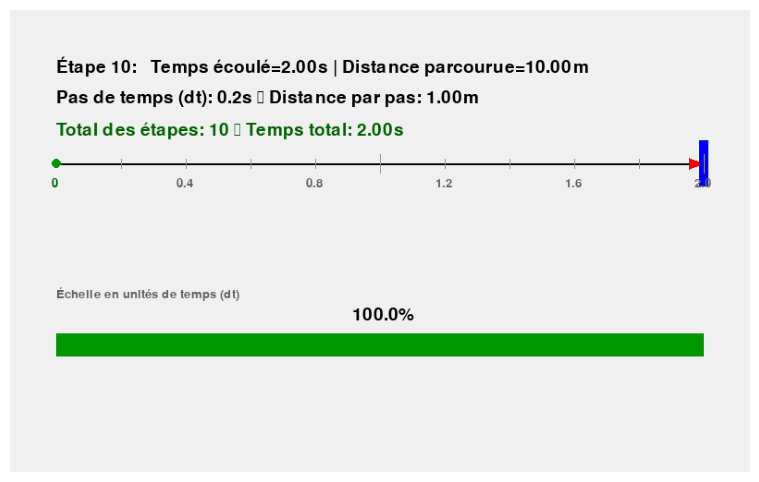

✓ Objectif atteint en 10 étapes - Position finale: 10.0 m
Temps total: 2.00s - Vitesse moyenne: 5.00m/s


In [25]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Initialiser pygame
pygame.init()

# Paramètres
v = 5
distance = 10
dt = 0.2
width, height = 800, 500
surface = pygame.Surface((width, height))

# Initialisation
t = 0
x = 0
step = 0

# Polices
font = pygame.font.SysFont(None, 28)
small_font = pygame.font.SysFont(None, 20)
target_x = width - 50

def draw_frame(x_progress, t, step):
    surface.fill((240, 240, 240))
    
    start_x, end_x = 50, width-50
    line_y = height//3
    
    # Ligne de trajectoire et position initiale
    pygame.draw.line(surface, (0, 0, 0), (start_x, line_y), (end_x, line_y), 2)
    pygame.draw.circle(surface, (0, 150, 0), (start_x, line_y), 5)
    surface.blit(small_font.render("0", True, (0, 100, 0)), (start_x-5, line_y+15))
    
    # Flèche rouge 
    arrow_x = start_x + (x_progress * (end_x-start_x))
    triangle_w, triangle_h = 16, 12  
    pygame.draw.polygon(
        surface,
        (255, 0, 0),
        [(int(arrow_x), line_y),  
         (int(arrow_x - triangle_w), line_y - triangle_h//2),
         (int(arrow_x - triangle_w), line_y + triangle_h//2)]
    )
    
    # Cible
    pygame.draw.rect(surface, (0, 0, 255), (int(target_x)-5, line_y-25, 10, 50))
    
    # Échelle en dt
    segment_length = (dt * v / distance) * (end_x-start_x)
    total_segments = int(distance / (dt * v))
    for i in range(1, total_segments + 1):
        mark_x = start_x + i * segment_length
        if mark_x > end_x: break
        mark_height = 10 if i % 5 == 0 else 5
        pygame.draw.line(surface, (150, 150, 150), 
                         (int(mark_x), line_y-mark_height), 
                         (int(mark_x), line_y+mark_height), 1)
        if i % max(1,int(0.5/dt)) == 0:
            surface.blit(small_font.render(f"{i*dt:.1f}", True, (100,100,100)), (int(mark_x)-10, line_y+15))
    
    # Texte info
    surface.blit(font.render(f"Étape {step}:   Temps écoulé={t:.2f}s | Distance parcourue={x_progress*distance:.2f}m", True, (0,0,0)), (50,50))
    surface.blit(font.render(f"Pas de temps (dt): {dt}s → Distance par pas: {dt*v:.2f}m", True, (0,0,0)), (50,85))
    if x_progress >= 1.0:
        surface.blit(font.render(f"Total des étapes: {step} → Temps total: {t:.2f}s", True, (0,100,0)), (50,120))
    
    # Barre de progression
    bar_y = height - 150
    bar_height = 25
    pygame.draw.rect(surface, (200, 200, 200), (50, bar_y, width-100, bar_height))
    pygame.draw.rect(surface, (0, 150, 0), (50, bar_y, int((width-100) * x_progress), bar_height))
    
    # Pourcentage
    surface.blit(font.render(f"{x_progress*100:.1f}%", True, (0,0,0)), (width//2-30, bar_y-30))
    surface.blit(small_font.render("Échelle en unités de temps (dt)", True, (100,100,100)), (50, bar_y-50))
    
    # Affichage matplotlib
    img = np.transpose(pygame.surfarray.array3d(surface), (1,0,2))
    plt.figure(figsize=(10,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Affichage initial
draw_frame(0, t, step)
print(f"Début: t={round(t,2)}s → position={round(x,2)}m")

# Simulation
while x < distance:
    time.sleep(0.8)
    x_progress = min(x / distance, 1.0)
    draw_frame(x_progress, t, step)
    print(f"Étape {step}:   Temps écoulé ={round(t,3)} → position={round(x,2)}m (+{round(dt*v,2)}m)")
    x += dt*v; t += dt; step += 1
    clear_output(wait=True)

draw_frame(1.0, t, step)
print(f"✓ Objectif atteint en {step} étapes - Position finale: {round(x,4)} m")
print(f"Temps total: {t:.2f}s - Vitesse moyenne: {distance/t:.2f}m/s")

## Conclusion : Le paradoxe de Zénon démasqué

### Notre simulation révèle la faille

Cette simulation révèle la faille logique du paradoxe de la flèche. En modélisant le mouvement avec différentes valeurs de dt, nous reproduisons - et résolvons - un piège similaire à celui de l'enfumeur antique grec :

### La "tricherie" moderne
Dans nos calculs numériques, nous pourrions tomber dans le même piège :
1. **Pour calculer le mouvement** : nous utilisons `dt = 0.1s` et calculons `distance = vitesse × dt = 5 × 0.1 = 0.5m`
2. **Pour "observer" le résultat** : nous regardons la position à l'instant t=0.1s et disons "regardez, elle est immobile à cette position !"
3. **La conclusion fallacieuse** : "Donc elle ne bouge jamais !"

### L'analogie révélatrice
C'est comme dire :
> *"Pendant cette heure, la voiture a roulé à 100 km/h"* (on utilise un intervalle pour définir le mouvement)
> 
> *"Maintenant, à cet instant précis, elle est immobile au kilomètre 100"* (on nie le mouvement à l'instant)
> 
> *"Donc la voiture ne s'est jamais déplacée !"*

### La réponse décisive : le mouvement persiste toujours

Notre simulation révèle la vérité fondamentale que Zénon ne pouvait pas voir :

**Aussi petit que soit dt, la flèche continue de se déplacer pendant cet intervalle.**
- Avec dt = 1s → elle parcourt 5m
- Avec dt = 0.1s → elle parcourt 0.5m  
- Avec dt = 0.001s → elle parcourt 0.005m
- Même avec dt infinitésimal → le mouvement persiste !

### Le verdict moderne

Le mouvement ne "disparaît" jamais, même à l'échelle de l'instant. Ce que les mathématiques modernes appellent la "vitesse instantanée" n'est pas l'absence de mouvement, mais le mouvement à cet instant précis.

**Zénon confondait "instant infiniment bref" avec "absence de mouvement".** Notre simulation montre que le mouvement est robuste : il survit à toutes les échelles de temps, du pas grossier de 1 seconde jusqu'à l'infinitésimal.

## Zénon et la Physique Quantique : une étonnante résonance

### Ce qui donne raison à Zénon...en apparence

**1. Le Paradoxe Quantique de Zénon (Quantum Zeno Effect)**  
C'est un effet réel et observable : si on observe continuellement une particule quantique, on l'empêche d'évoluer !  

- *Analogie* : Comme une flèche qui ne bouge pas si on la regarde trop souvent  
- *Principe* : Une mesure quantique "réinitialise" l'évolution temporelle  
- *Expérience réelle* : Des atomes peuvent être "gelés" dans un état par des mesures répétées  

**2. Nature Discrète et Granulaire**  
La physique quantique suggère que l'espace-temps pourrait être discret à l'échelle de Planck :  
- *Comme si l'Univers avait un "dt minimum"*

### Ce qui donne tord à Zénon 

**1. Ce n'est pas du tout le même "instant"**  
- **Zénon** : Instant mathématique idéalisé (dt = 0)  
- **Quantique** : Intervalle de temps très court mais non nul (dt > 0)  

**2. Le mouvement n'est pas nié, il est modifié**  
L'effet Zénon quantique ne prouve pas que le mouvement n'existe pas, mais montre que l'observation affecte le système observé.  

**3. Superpositions et Probabilités**  
En quantique, une particule n'a pas de position précise entre les mesures - elle existe dans une superposition de positions possibles.

### En quelques mots

- **Zénon avait tort** : le mouvement existe bel et bien  
- **Mais il avait une intuition** : trop regarder quelque chose change son comportement  
- **La quantique le confirme** : regarder trop souvent une particule l'empêche d'évoluer  

*C'est comme si Zénon avait fait une mauvaise addition... mais était tombé par hasard sur le bon résultat !*

In [23]:
def mouvement_uniforme(vitesse, distance_cible, pas_temps):
    """Simule un mouvement rectiligne uniforme."""
    t = 0.0
    x = 0.0
    step = 0
    history = []
    
    print(f"{'Étape':>5} | {'Temps (s)':>10} | {'Position (m)':>12} | {'Déplacement dt':>15}")
    print("-" * 50)
    print(f"{step:>5} | {t:>10.3f} | {x:>12.3f} | {'(initial)':>15}")
    
    while x < distance_cible:
        deplacement_dt = pas_temps * vitesse
        x += deplacement_dt
        t += pas_temps
        step += 1
        history.append((step, t, x, deplacement_dt))
        print(f"{step:>5} | {t:>10.3f} | {x:>12.3f} | {deplacement_dt:>15.3f}")
    
    print(f"\nObjectif atteint en {step} étapes - Position finale: {x:.3f} m")
    return history

# Test
if __name__ == "__main__":
    mouvement_uniforme(5, 10, 0.1)

Étape |  Temps (s) | Position (m) |  Déplacement dt
--------------------------------------------------
    0 |      0.000 |        0.000 |       (initial)
    1 |      0.100 |        0.500 |           0.500
    2 |      0.200 |        1.000 |           0.500
    3 |      0.300 |        1.500 |           0.500
    4 |      0.400 |        2.000 |           0.500
    5 |      0.500 |        2.500 |           0.500
    6 |      0.600 |        3.000 |           0.500
    7 |      0.700 |        3.500 |           0.500
    8 |      0.800 |        4.000 |           0.500
    9 |      0.900 |        4.500 |           0.500
   10 |      1.000 |        5.000 |           0.500
   11 |      1.100 |        5.500 |           0.500
   12 |      1.200 |        6.000 |           0.500
   13 |      1.300 |        6.500 |           0.500
   14 |      1.400 |        7.000 |           0.500
   15 |      1.500 |        7.500 |           0.500
   16 |      1.600 |        8.000 |           0.500
   17 |      